<a href="https://colab.research.google.com/github/Ye-Gao1/Neural-Network/blob/main/Neural_Networks_Food_Type_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Food Type Classifier


1. Dependecies and Data Downloads

In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
try:
  os.mkdir('/content/food/')
except:
  print("/content/food/ already exists")
!gdown https://drive.google.com/uc?id=17K7m5uQ17NdhBoNF2H3Y5BeYQGeKbBph
!unzip -d /content/food/ /content/fFood.zip

Streaming output truncated to the last 5000 lines.
  inflating: /content/food/Fast Food Classification V2/Train/Taquito/Taquito-Train (1).jpeg  
  inflating: /content/food/Fast Food Classification V2/Train/Taquito/Taquito-Train (10).jpeg  
  inflating: /content/food/Fast Food Classification V2/Train/Taquito/Taquito-Train (100).jpeg  
  inflating: /content/food/Fast Food Classification V2/Train/Taquito/Taquito-Train (1000).jpeg  
  inflating: /content/food/Fast Food Classification V2/Train/Taquito/Taquito-Train (1001).jpeg  
  inflating: /content/food/Fast Food Classification V2/Train/Taquito/Taquito-Train (1002).jpeg  
  inflating: /content/food/Fast Food Classification V2/Train/Taquito/Taquito-Train (1003).jpeg  
  inflating: /content/food/Fast Food Classification V2/Train/Taquito/Taquito-Train (1004).jpeg  
  inflating: /content/food/Fast Food Classification V2/Train/Taquito/Taquito-Train (1005).jpeg  
  inflating: /content/food/Fast Food Classification V2/Train/Taquito/Taquito-Train

2. Locating the Bad Files

In [3]:
#Find Bad Files
from tqdm import tqdm
import imghdr
files = []
sizes = []
bad_images = []
for dir in ['/content/food/Fast Food Classification V2/Test', '/content/food/Fast Food Classification V2/Train', '/content/food/Fast Food Classification V2/Valid']:
  os.chdir(dir)
  for classname in os.listdir():
    os.chdir(str(dir)+'/'+str(classname))
    for filename in os.listdir():
      files.append(filename)
      filepath = str(dir)+'/'+str(classname)+'/'+str(filename)
      sizes.append(os.path.getsize(filepath))

      img_type = imghdr.what(filepath)
      if not(img_type=='jpeg' or img_type=='png'):
          print(f"{filepath} is not an image")
          bad_images.append(filepath)

/content/food/Fast Food Classification V2/Train/Hot Dog/Hot Dog - Train (39).jpg is not an image
/content/food/Fast Food Classification V2/Train/Hot Dog/Hot Dog - Train (11).jpg is not an image
/content/food/Fast Food Classification V2/Train/Hot Dog/Hot Dog - Train (75).jpg is not an image
/content/food/Fast Food Classification V2/Train/Hot Dog/Hot Dog - Train (59).jpg is not an image
/content/food/Fast Food Classification V2/Train/Hot Dog/Hot Dog - Train (73).jpg is not an image
/content/food/Fast Food Classification V2/Train/Hot Dog/Hot Dog - Train (42).jpg is not an image
/content/food/Fast Food Classification V2/Train/Donut/Donut (16).jpg is not an image


In [4]:
#Then get rid of the bad files
import shutil
for filepath in bad_images:
  shutil.move(filepath, '/content/')

3. Pick the Foods you Want!

In [5]:
all_classes = ['Burger', 'Taquito', 'Taco', 'Crispy Chicken', 'Donut', 'Baked Potato', 'Hot Dog', 'Pizza', 'Fries', 'Sandwich']

#######################
classes = ['Pizza', 'Fries', 'Sandwich'] #Classes you DO want
#######################

delete = [] #Classes you DON'T want
for food in all_classes:
  if food not in classes:
    delete.append(food)
print(delete)

for split in ['Test', 'Train', 'Valid']:
  for classname in delete:
    folder = os.path.join('/content/food/Fast Food Classification V2', split, classname)
    try:
      shutil.move(folder, os.path.join('/content/', split))
    except:
      pass

['Burger', 'Taquito', 'Taco', 'Crispy Chicken', 'Donut', 'Baked Potato', 'Hot Dog']


4. Datagen Baby!

In [6]:
from tqdm import tqdm
splits = ["/content/food/Fast Food Classification V2/Train", "/content/food/Fast Food Classification V2/Valid", "/content/food/Fast Food Classification V2/Test"]

samples = []
labels = []


test_train_val = 2
os.chdir(splits[test_train_val])

label = 0
for classname in os.listdir():
  print('\n'+str(classname))
  os.chdir(os.path.join(splits[test_train_val], classname))
  for filename in tqdm(os.listdir()):
    if not(filename.__contains__('.ipynb_checkpoints')):
      #Image
      filepath = os.path.join(splits[test_train_val], classname, filename)
      img = tf.keras.utils.load_img(
            filepath,
            color_mode='rgb',
            target_size=(224,224))
      img = tf.keras.utils.img_to_array(img)
      img = tf.cast(img, 'float32')/255.0
      samples.append(img)
      #Label
      labels.append(tf.constant(label))
  label+=1


Sandwich


100%|██████████| 200/200 [00:01<00:00, 179.63it/s]



Fries


100%|██████████| 100/100 [00:00<00:00, 646.90it/s]



Pizza


100%|██████████| 200/200 [00:00<00:00, 653.89it/s]


In [7]:
train_ds = tf.data.Dataset.from_tensor_slices((samples, labels))
train_ds = train_ds.cache().shuffle(7500).batch(32).prefetch(32)

In [8]:
val_ds = tf.data.Dataset.from_tensor_slices((samples, labels))
val_ds = val_ds.batch(32).prefetch(25).cache().shuffle(750)

In [9]:
test_ds = tf.data.Dataset.from_tensor_slices((samples, labels))
test_ds = test_ds.batch(32).prefetch(25).cache().shuffle(750)

In [11]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/food/Fast Food Classification V2/Train',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/food/Fast Food Classification V2/Valid',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/food/Fast Food Classification V2/Test',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 4500 files belonging to 3 classes.
Found 1000 files belonging to 3 classes.
Found 500 files belonging to 3 classes.


5. Visualize the Data

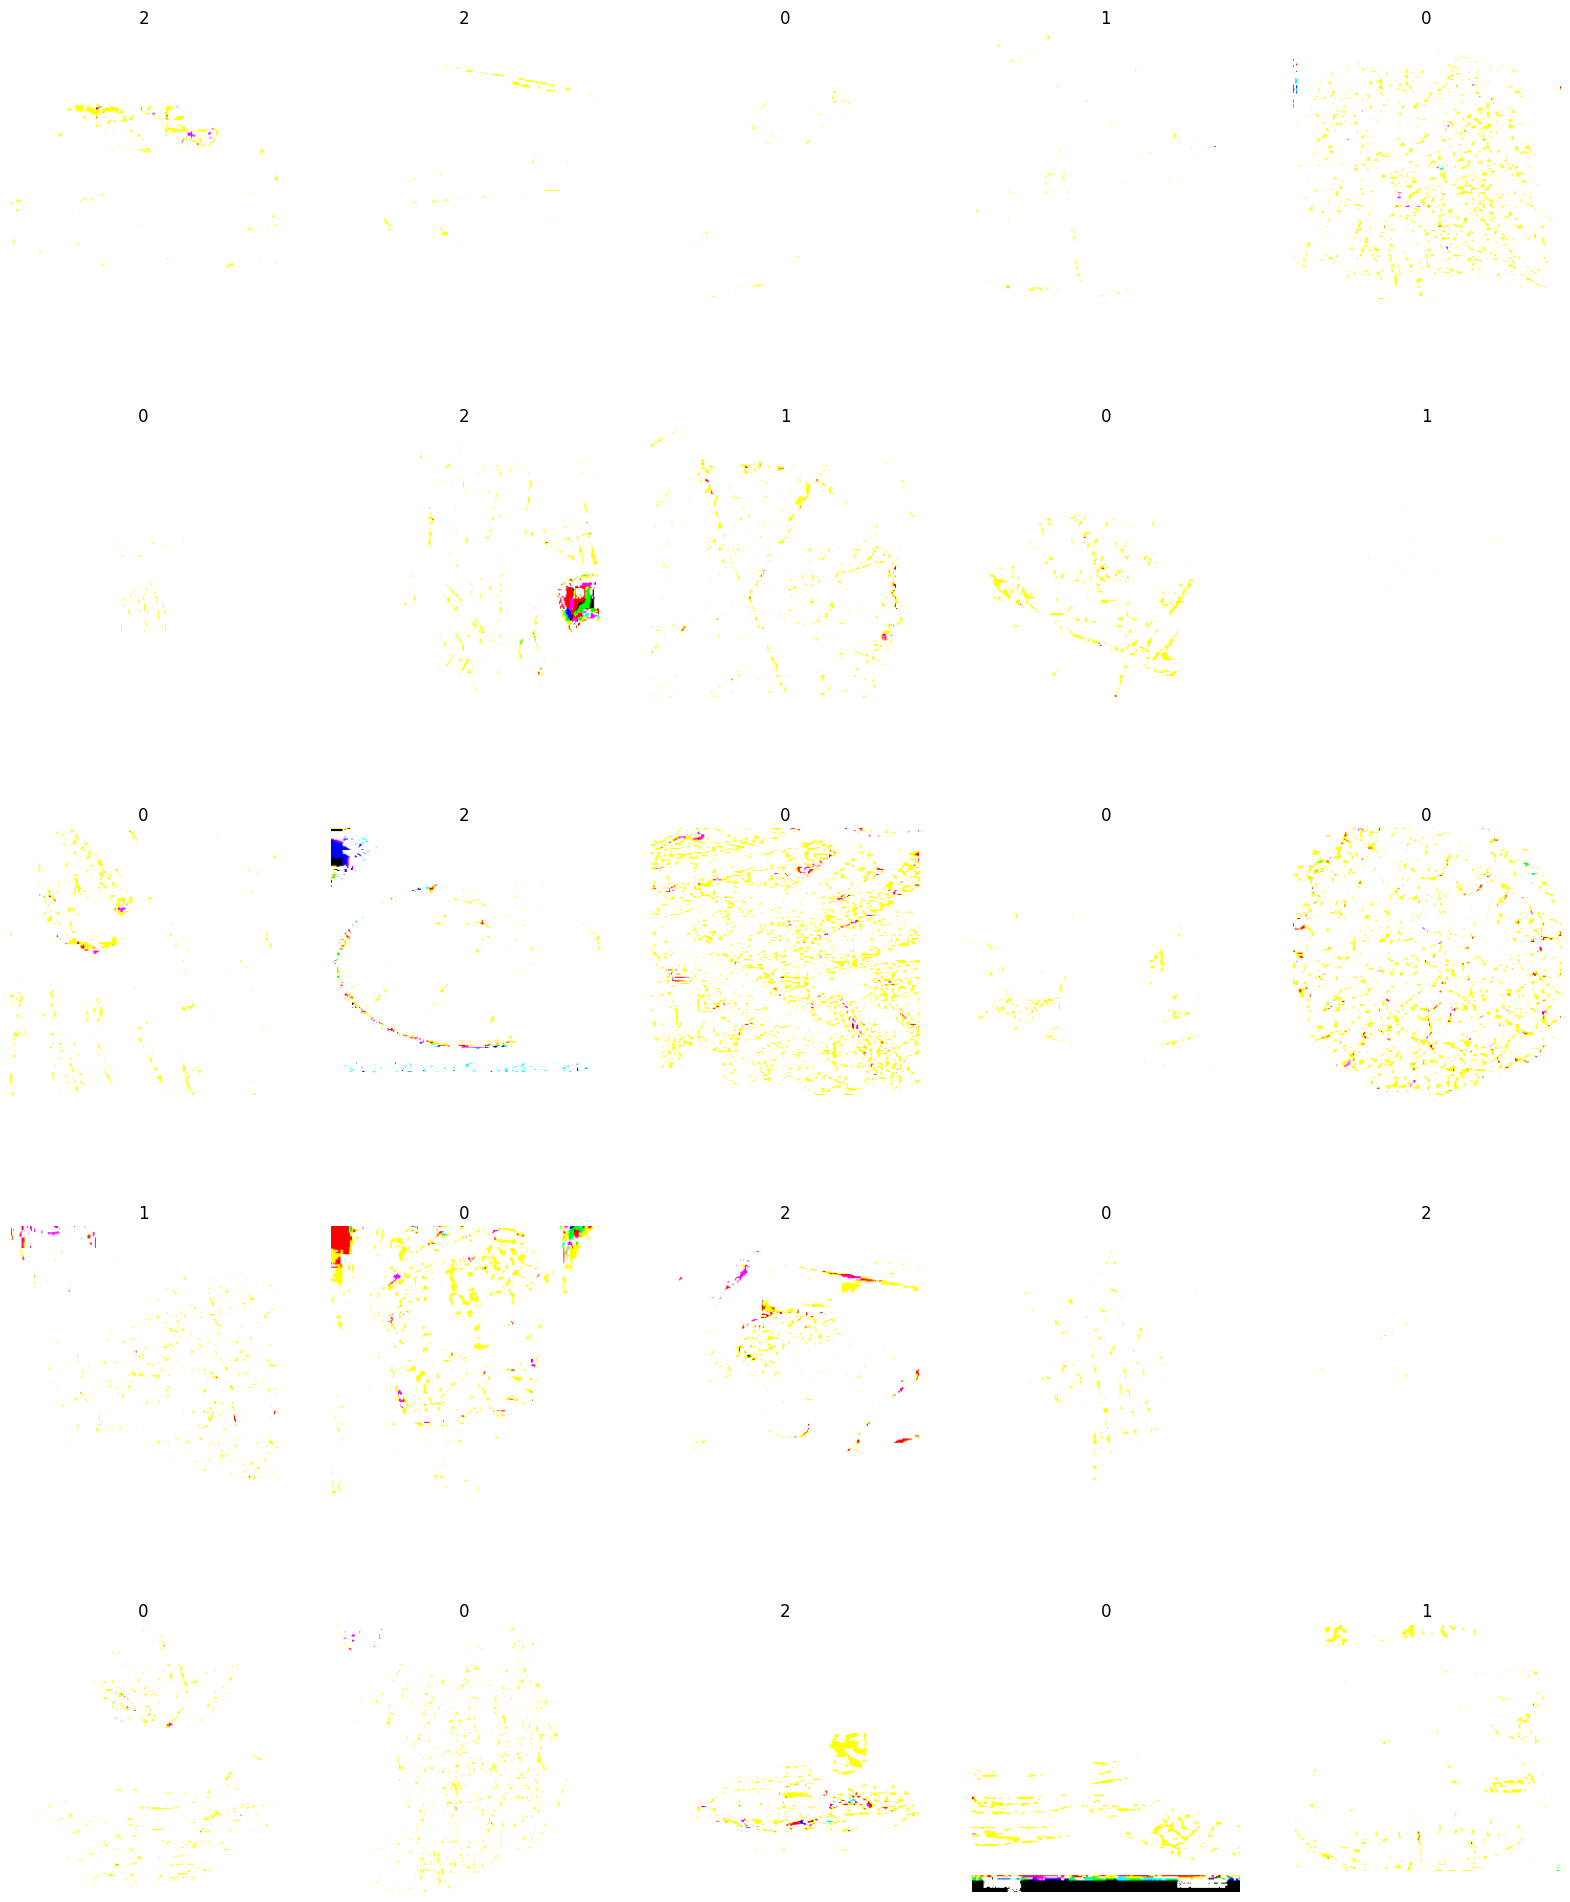

In [18]:
x = []
y = []
for image, label in train_ds.take(25):
  x.append(image)
  y.append(label)

fig, axs = plt.subplots(5,5, figsize=(20,25))

for i in range(5):
  for a in range(5):
    axs[i,a].imshow(x[0][5*i+a])
    name = y[0][5*i+a].numpy()
    axs[i,a].set_title(name)
    axs[i,a].axis('off')
plt.show()

##Do Some Transfer Learning

In [13]:
import tensorflow.keras.layers as lay
from tensorflow.keras.applications import MobileNet

net = MobileNet(weights='imagenet', include_top=True, input_shape=(224,224,3))

net_model = tf.keras.models.Sequential()

for i in range(len(net.layers)):
  net_model.add(net.layers[i])

for layer in net_model.layers:
  layer.trainable = False

net_model.pop()
net_model.add(lay.Dense(20, activation='relu'))
net_model.add(lay.Dense(len(classes), activation='softmax'))

net_model.summary()

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,273,947 (16.30 MB)

 Trainable params: 20,083 (78.45 KB)

 Non-trainable params: 4,253,864 (16.23 MB)

In [14]:
#Train the Model
net_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
net_model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 28s 121ms/step - accuracy: 0.5412 - loss: 1.1438 - val_accuracy: 0.6740 - val_loss: 0.7622
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 23s 54ms/step - accuracy: 0.7175 - loss: 0.6979 - val_accuracy: 0.6940 - val_loss: 0.7617
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.7511 - loss: 0.6221 - val_accuracy: 0.7150 - val_loss: 0.6696
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - accuracy: 0.7474 - loss: 0.6274 - val_accuracy: 0.7260 - val_loss: 0.6489
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 0.7676 - loss: 0.5812 - val_accuracy: 0.7260 - val_loss: 0.6435
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.7830 - loss: 0.5579 - val_accuracy: 0.7280 - val_loss: 0.6404
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - accuracy: 0.7852 - loss: 0.5320 - val_accuracy: 0.7370 - val_loss: 0.6313
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 0.7850 - loss: 0.5316 - val

In [15]:
#test
net_model.evaluate(test_ds)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 157ms/step - accuracy: 0.8139 - loss: 0.4929


[0.5026483535766602, 0.8159999847412109]

## Test

4912/4912 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


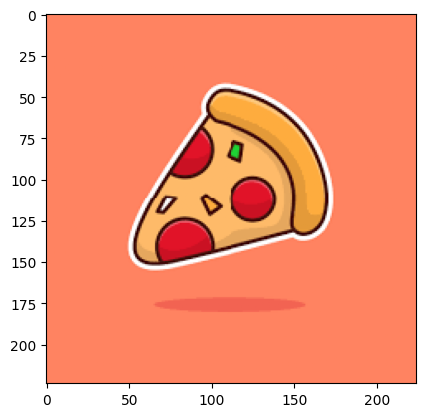

In [16]:
filepath = tf.keras.utils.get_file(
    "/content/image",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ4tNOdj-B5SFxJmG28gKv-jrey9FXbOhdcOOxVU09JdqZxDDrGqalrpVizxvdsyxhRXTg&usqp=CAU", #image url here
    )

img = tf.keras.utils.load_img(
            filepath,
            color_mode='rgb',
            target_size=(224,224))
os.remove("/content/image")
img = tf.keras.utils.img_to_array(img)
img = tf.cast(img, 'float32')/255.0
plt.imshow(img)

In [17]:
def predict(image):
  results = net_model.predict(tf.expand_dims(image, axis=0))
  highest = np.amax(results)
  class_num = results.tolist()[0].index(highest)
  if class_num==0:
    return "The image is a pizza."
  elif class_num==1:
    return "The image is a sandwich."
  elif class_num==2:
    return "The image a picture of fries."

print(predict(img))

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
The image is a pizza.
